In [6]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [7]:
env = gym.make('gym_pdw:pdw-v0')

In [11]:

def SARSA(gamma, alpha, epsilon, episodes):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.observation_space.shape[0], env.observation_space.shape[1], env.action_space.n])

    
    # Epsilon-greedy action selection
    def select_action(epsilon, state):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
#             print("rand", action)
        else:
            action = np.argmax(Q[state[0],state[1]][:])
#             print("greedy", action)
        return action

    
    # Q function update 
    def update(state, action, reward, next_state, next_action):
#         print(next_state[0], next_state[1], next_action,"=========")
#         print(Q[next_state[0],next_state[1]][next_action])
        nonlocal Q
        target = reward + gamma*(Q[next_state[0],next_state[1]][next_action])
        estimate = Q[state[0],state[1]][action]

        Q[state[0],state[1]][action] = Q[state[0],state[1]][action] + alpha*(target - estimate)

        
        
        
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])

    
    for episode in range(episodes):

        env.reset()
        curr_state = env.get_state()
        print(curr_state ,"init====================")

#         # Number of steps required to reach goal
#         steps[episode] = 0
#         avg_reward[episode] = 0

        while True:

            action = select_action(epsilon, curr_state)
            next_state, reward = env.step(action)

            next_action = select_action(epsilon, next_state)
            update(curr_state, action, reward, next_state, next_action)
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]

            curr_state = next_state
            print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [12]:
def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()


[[0, 11], [0, 11], [0, 11], [0, 11]] 1
[0, 11]
[0, 11] init====================
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[1, 10] curr_state [[0, 11], [1, 10], [0, 11], [0, 11]]
[2, 11] curr_state [[0, 11], [2, 11], [0, 11], [0, 11]]
[2, 10] curr_state [[0, 11], [2, 10], [0, 11], [0, 11]]
[3, 10] curr_state [[0, 11], [3, 10], [0, 11], [0, 11]]
[3, 10] curr_state [[0, 11], [3, 10], [0, 11], [0, 11]]
[2, 11] curr_state [[0, 11], [2, 11], [0, 11], [0, 11]]
[2, 11] curr_state [[0, 11], [2, 11], [0, 11], [0, 11]]
[2, 10] curr_state [[0, 11], [2, 10], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 

[11, 11] curr_state [[0, 11], [0, 11], [11, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [11, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [10, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [10, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [10, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [0, 11], [10, 10], [0, 11]]
[10, 9] curr_state [[0, 11], [0, 11], [10, 9], [0, 11]]
[11, 10] curr_state [[0, 11], [0, 11], [11, 10], [0, 11]]
[11, 10] curr_state [[0, 11], [0, 11], [11, 10], [0, 11]]
[11, 10] curr_state [[0, 11], [0, 11], [11, 10], [0, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [11, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [11, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [0, 11], [11, 10], [0, 11]]
[11, 9] curr_state [[0, 11], [0, 11], [11, 9], [0, 11]]
[11, 9] curr_state [[0, 11], [0, 11], [11, 9], [0, 11]]
[11, 9] curr_state [[0, 11], [0, 11], [11, 9], [0, 11]]
[11, 8] curr_state [[0, 11], [0, 11], [11, 8], [0, 11]]
[10, 8] curr_state [[0, 

[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 10] curr_state [[0, 11], [0, 11], [0, 11], [11, 10]]
[10, 10] curr_state [[0, 11], [0, 11], [0, 11], [10, 10]]
[10, 9] curr_state [[0, 11], [0, 11], [0, 11], [10, 9]]
[10, 10] curr_state [[0, 11], [0, 11], [0, 11], [10, 10]]
[10, 9] curr_state [[0, 11], [0, 11], [0, 11], [10, 9]]
[9, 10] curr_state [[0, 11], [0, 11], [0, 11], [9, 10]]
[9, 10] curr_state [[0, 11], [0, 11], [0, 11], [9, 10]]
[10, 10] curr_state [[0, 11], [0, 11], [0, 11], [10, 10]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[

[9, 10] curr_state [[0, 11], [0, 11], [0, 11], [9, 10]]
[10, 10] curr_state [[0, 11], [0, 11], [0, 11], [10, 10]]
[10, 9] curr_state [[0, 11], [0, 11], [0, 11], [10, 9]]
[10, 8] curr_state [[0, 11], [0, 11], [0, 11], [10, 8]]
[10, 8] curr_state [[0, 11], [0, 11], [0, 11], [10, 8]]
[10, 10] curr_state [[0, 11], [0, 11], [0, 11], [10, 10]]
[10, 11] curr_state [[0, 11], [0, 11], [0, 11], [10, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [0, 11], [10, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [0, 11], [10, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [0, 11], [10, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[0, 11], [0, 11], [0, 11], [11, 11]]
[11, 11] curr_state [[

[9, 9] curr_state [[0, 11], [9, 9], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [9, 11], [0, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [9, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11]

[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_

[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
[8, 10] curr_state [[0, 11], [8, 10], [0, 11], [0, 11]]
[8, 10] curr_state [[0, 11], [8, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [10, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[

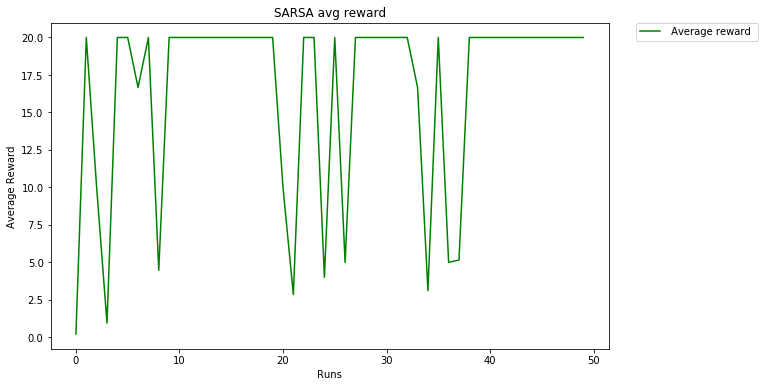

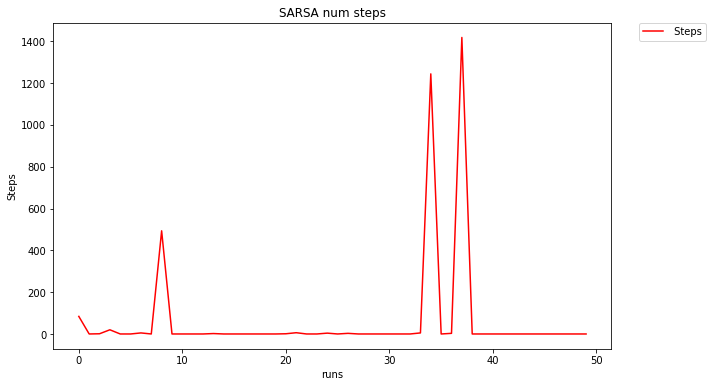

In [13]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    avg_reward, steps, Q = SARSA(gamma,alpha,epsilon, episodes)
    plot_sarsa(avg_reward, steps, episodes)

In [15]:
Q

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.2       ,  0.        ,  0.        ,  0.        ],
        [ 0.3998    ,  0.        ,  0.        ,  0.        ],
        [ 0.7988008 ,  0.        ,  0.        ,  0.2035982 ],
        [ 0.        ,  1.39580699,  0.        ,  0.        ],
        [ 0.81474873,  3.56615995,  0.21610445,  0.        ],
        [ 1.75690565,  7.36677628,  0.23016873,  0.74830823]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
      

In [6]:
env.reset()
env.current_position

[11, 0]

In [10]:
for i in range(12):
    for j in range(12):
        for act in range(4):
            pos = [i,j]
            Q[pos,act] = 0

TypeError: 'int' object does not support item assignment

In [40]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

4

In [5]:
env = gym.make('FrozenLake-v0')

In [6]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [7]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

[0.0, 0.0, 0.0, 0.0]

In [21]:
q = np.zeros([tuple([12,12]),0]) 

TypeError: 'tuple' object cannot be interpreted as an integer

In [76]:
q = np.zeros([12,12,4])
q[11,11][2]

0.0

In [70]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


(2,)


AxisError: axis 1 is out of bounds for array of dimension 1

In [74]:
q[2,np.squeeze(s)]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
Q = {}
# states = grid.all_states()
for s in states:
Q[s] = {}
for a in ALL_POSSIBLE_ACTIONS:
Q[s][a] = 0